In [1]:
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Exploratory Data Analysis

Basic stuff, nothing too complex.

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Data load

In [3]:
df_train = pd.read_csv('../data/raw/Corona_NLP_train.csv',sep=',')
df_test = pd.read_csv('../data/raw/Corona_NLP_test.csv',sep=',')

In [4]:
df_train.head() 

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


### Dataset info

In [6]:
print("Train df shape: {}".format(df_train.shape))
print("Test df shape: {}".format(df_test.shape))

Train df shape: (41157, 6)
Test df shape: (3798, 6)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


### Some plots

#### label distributions

In [9]:
def cat_countplots(column_name,df_train,df_test,order_list):
    fig, axes = plt.subplots(1,2,figsize=(20,5))
    sns.countplot(x=column_name,data=df_train,ax=axes[0],order=order_list)
    sns.countplot(x=column_name,data=df_test,ax=axes[1],order=order_list)
    axes[0].set_title('Label distribution for train dataset')
    axes[1].set_title('Label distribution for test dataset')
    plt.show()

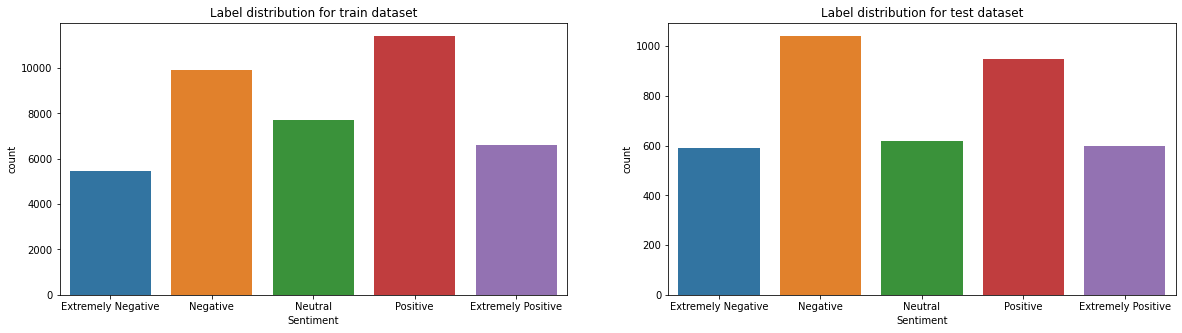

In [10]:
labels_order = ['Extremely Negative','Negative','Neutral','Positive','Extremely Positive']

cat_countplots('Sentiment',df_train,df_test,labels_order)

In [11]:
replace_dict = {
    'Extremely Negative':'Negative',
    'Extremely Positive':'Positive'
}

df_train['Sentiment_agg'] = df_train.Sentiment.replace(replace_dict)
df_test['Sentiment_agg'] = df_test.Sentiment.replace(replace_dict)

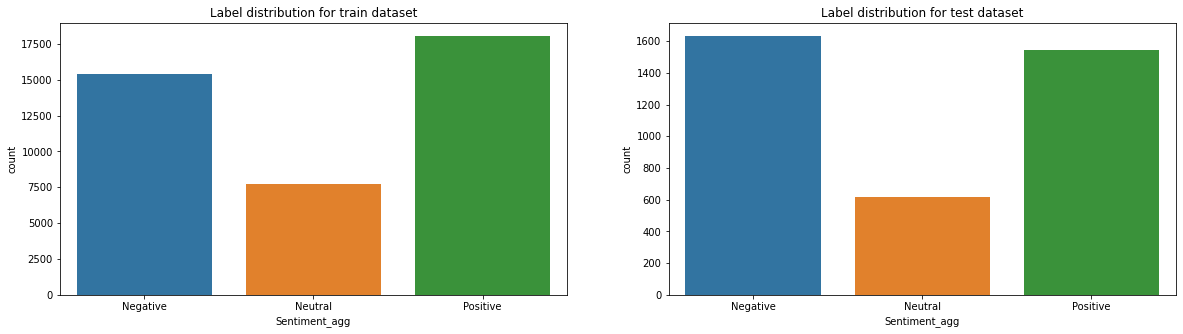

In [12]:
agg_labels_order = ['Negative','Neutral','Positive']

cat_countplots('Sentiment_agg',df_train,df_test,agg_labels_order)

Labels distributions are slightly differents, with train dataset being more positive, while being more equally in test dataset.

#### Words count

Why not.

In [13]:
def histograms(column_name,df_train,df_test,hue_order):
    fig, axes = plt.subplots(1,2,figsize=(20,5),sharex=True)
    sns.histplot(x = column_name, hue = 'Sentiment_agg', data = df_train, ax = axes[0], hue_order = hue_order, bins = 25)
    sns.histplot(x = column_name, hue = 'Sentiment_agg', data = df_test, ax = axes[1], hue_order = hue_order, bins = 25) 
    axes[0].set_title('{} distribution for train dataset'.format(column_name))
    axes[1].set_title('{} distribution for test dataset'.format(column_name))
    plt.show()
    

In [14]:
df_train['words_count'] = df_train.OriginalTweet.str.split().str.len()
df_test['words_count'] = df_test.OriginalTweet.str.split().str.len()

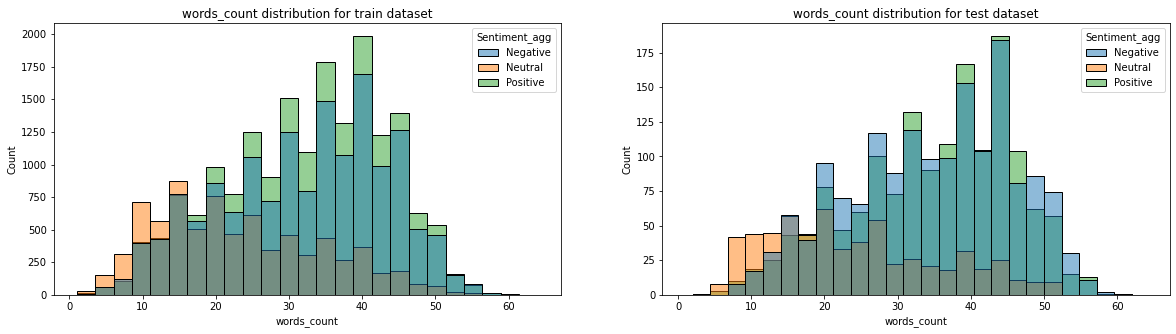

In [15]:
histograms('words_count',df_train,df_test,agg_labels_order)

The words count distribution is pretty similar between two datasets. Also, Neutral tweets tend to be shorter.

#### Hashtag count and users Mentions

In [16]:
def count_patterns(df,regex_pattern,new_column):
    df[new_column] = df.apply(
        lambda x: len(
            re.findall(regex_pattern,x.OriginalTweet)
        ), axis = 1
    )
    return df

In [17]:
df_train = count_patterns(df_train,'\B#([a-z]*[A-Z]*[0-9]*[0-9]*_*)*','hashtags_count')
df_test = count_patterns(df_train,'\B#([a-z]*[A-Z]*[0-9]*[0-9]*_*)*','hashtags_count')

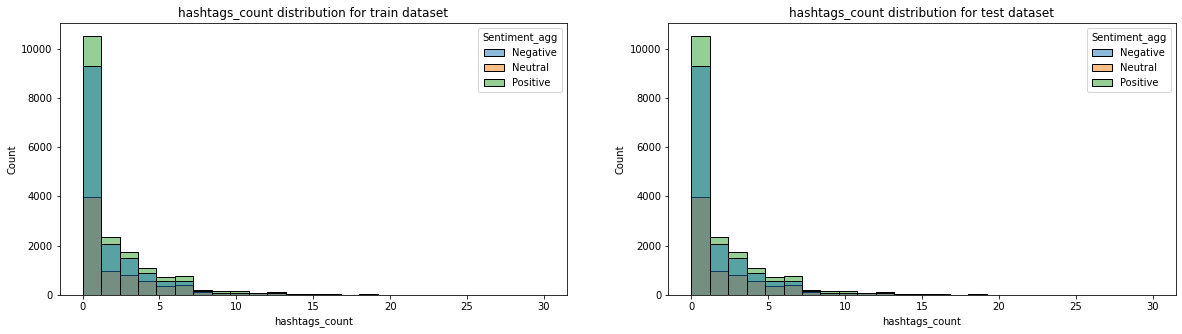

In [18]:
histograms('hashtags_count',df_train,df_test,agg_labels_order)

Similar for between sets and labels.

In [20]:
df_train = count_patterns(df_train,'\B@([a-z]*[A-Z]*[0-9]*[0-9]*_*)*','user_mentions_count')
df_test = count_patterns(df_train,'\B@([a-z]*[A-Z]*[0-9]*[0-9]*_*)*','user_mentions_count')

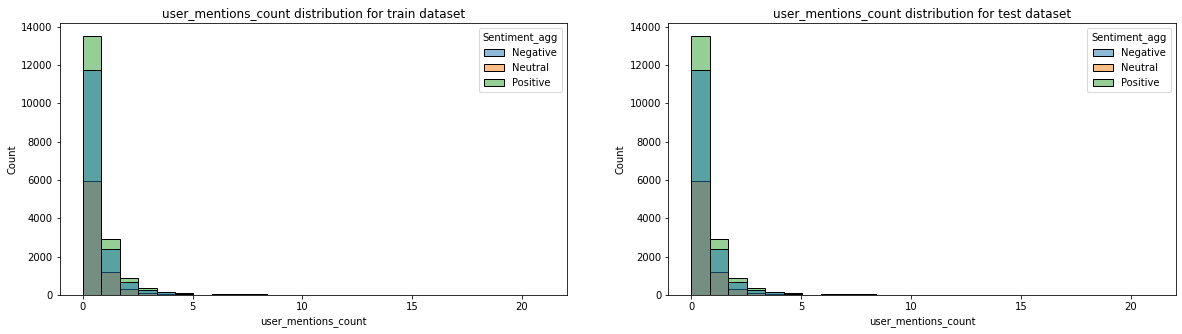

In [21]:
histograms('user_mentions_count',df_train,df_test,agg_labels_order)

Same for user mentions.